In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import statsmodels.api as smd
from sklearn.linear_model import LogisticRegression
import scipy.stats as st
import sklearn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
churn_data = pd.read_csv("G:\\churn_data.csv")
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
customer_data = pd.read_csv("G:\\customer_data.csv")
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [4]:
internet_data = pd.read_csv("G:\\internet_data.csv")
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [5]:
df1 = pd.merge(churn_data,customer_data,how="inner",on="customerID")

In [6]:
telecom = pd.merge(df1,internet_data,how="inner",on="customerID")
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [7]:
telecom.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [8]:
telecom.shape

(7042, 21)

In [9]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7042.000000,7042.000000,7042.000000
mean,32.366373,64.755886,0.162170
std,24.557955,30.088238,0.368633
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [10]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7042 entries, 0 to 7041
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7042 non-null   object 
 1   tenure            7042 non-null   int64  
 2   PhoneService      7042 non-null   object 
 3   Contract          7042 non-null   object 
 4   PaperlessBilling  7042 non-null   object 
 5   PaymentMethod     7042 non-null   object 
 6   MonthlyCharges    7042 non-null   float64
 7   TotalCharges      7042 non-null   object 
 8   Churn             7042 non-null   object 
 9   gender            7042 non-null   object 
 10  SeniorCitizen     7042 non-null   int64  
 11  Partner           7042 non-null   object 
 12  Dependents        7042 non-null   object 
 13  MultipleLines     7042 non-null   object 
 14  InternetService   7042 non-null   object 
 15  OnlineSecurity    7042 non-null   object 
 16  OnlineBackup      7042 non-null   object 


In [11]:
telecom["TotalCharges"] = telecom["TotalCharges"].replace(" ",np.nan)

In [12]:
telecom["TotalCharges"] = pd.to_numeric(telecom["TotalCharges"])

In [13]:
value = telecom["MonthlyCharges"] * telecom["tenure"]
telecom["TotalCharges"] = value.where(telecom["TotalCharges"] == np.nan,other=telecom["TotalCharges"])

In [14]:
telecom["TotalCharges"]

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7037    1419.40
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
Name: TotalCharges, Length: 7042, dtype: float64

(array([2709., 1228.,  671.,  508.,  454.,  412.,  395.,  309.,  223.,
         122.]),
 array([  18.8,  885.4, 1752. , 2618.6, 3485.2, 4351.8, 5218.4, 6085. ,
        6951.6, 7818.2, 8684.8]),
 <BarContainer object of 10 artists>)

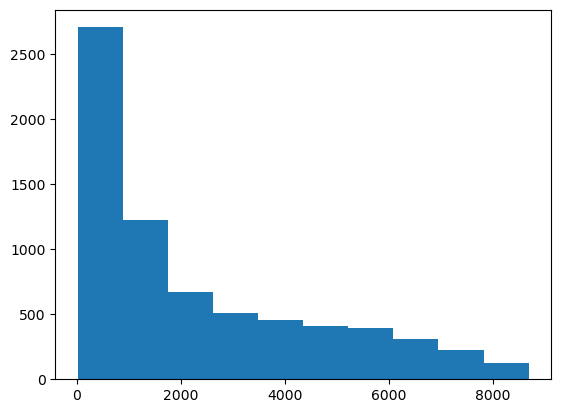

In [15]:
plt.hist(telecom["TotalCharges"])

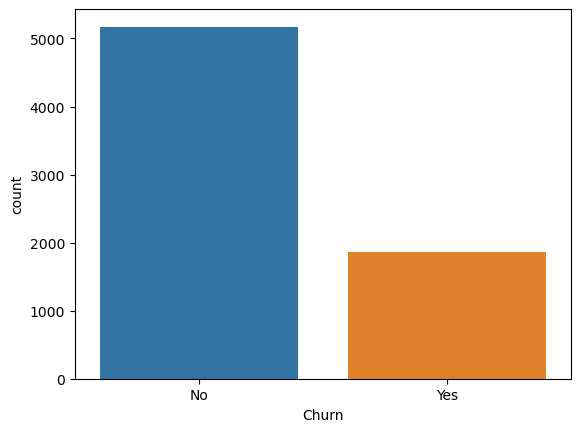

In [16]:
plt1 = sns.countplot(telecom["Churn"])

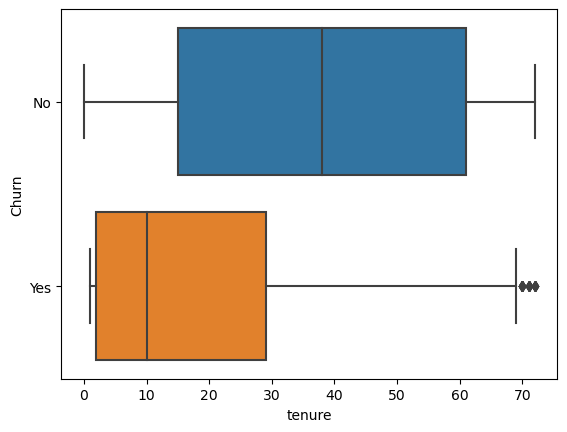

In [17]:
sns.boxplot(x = "tenure",y = "Churn", data = telecom)
plt.show()

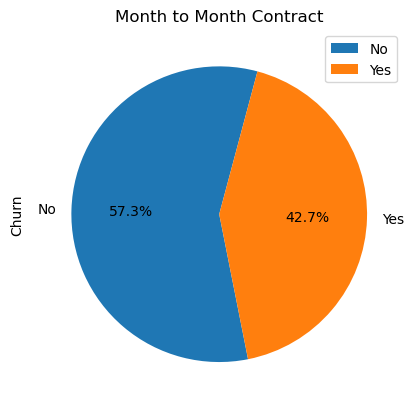

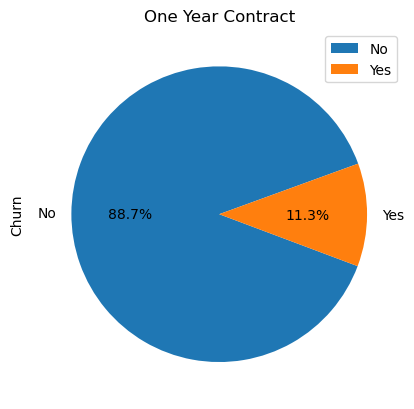

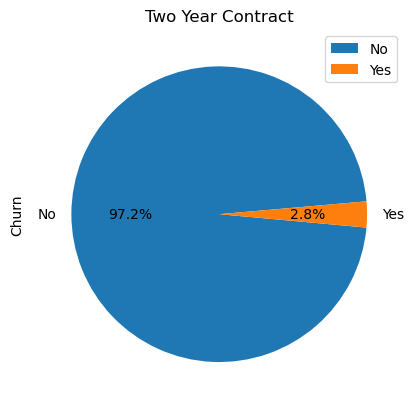

In [18]:
pie_contract_m2m = pd.DataFrame(telecom[telecom["Contract"] == "Month-to-month"]["Churn"].value_counts())
pie_contract_m2m.plot.pie(subplots = True, labels = pie_contract_m2m.index.values, autopct = "%1.1f%%",startangle = 75)
plt.title("Month to Month Contract")
plt.gca().set_aspect("equal")

pie_contract_1y = pd.DataFrame(telecom[telecom["Contract"] == "One year"]["Churn"].value_counts())
pie_contract_1y.plot.pie(subplots = True, labels = pie_contract_1y.index.values, autopct = "%1.1f%%",startangle = 20)
plt.title("One Year Contract")
plt.gca().set_aspect("equal")

pie_contract_2y = pd.DataFrame(telecom[telecom["Contract"] == "Two year"]["Churn"].value_counts())
pie_contract_2y.plot.pie(subplots = True, labels = pie_contract_2y.index.values, autopct = "%1.1f%%",startangle = 5)
plt.title("Two Year Contract")
plt.gca().set_aspect("equal")

plt.show()

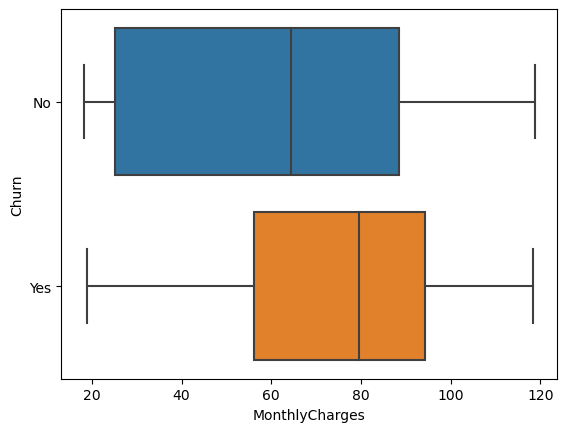

In [19]:
sns.boxplot(x = "MonthlyCharges",y = "Churn",data = telecom)
plt.show()

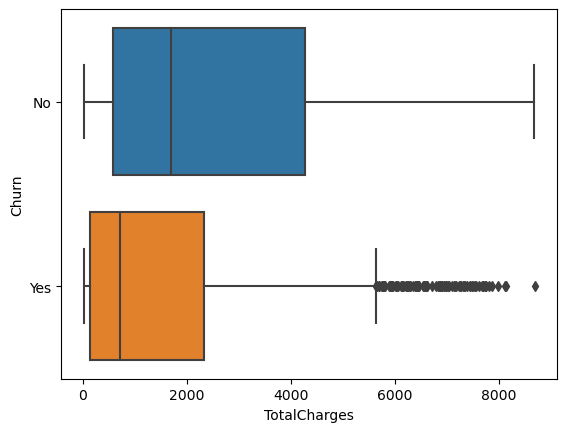

In [20]:
sns.boxplot(x = "TotalCharges",y="Churn",data = telecom)
plt.show()

<Figure size 1500x500 with 0 Axes>

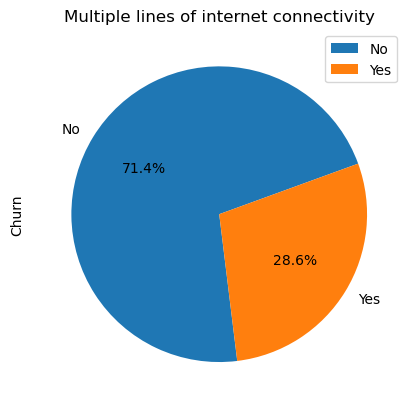

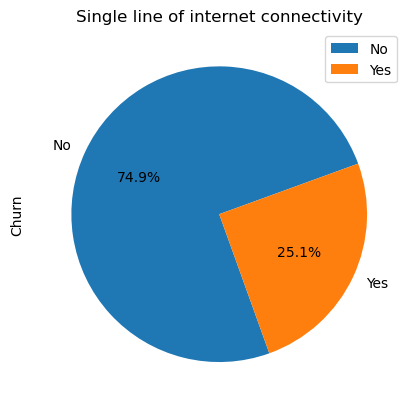

In [21]:
plt.figure(figsize = (15,5))
pie_MultipleLines_y = pd.DataFrame(telecom[telecom["MultipleLines"] == "Yes"]["Churn"].value_counts())
pie_MultipleLines_y.plot.pie(subplots = True, labels = pie_MultipleLines_y.index.values,autopct = "%1.1f%%",startangle = 20)
plt.title("Multiple lines of internet connectivity")
plt.gca().set_aspect("equal")

pie_MultipleLines_N = pd.DataFrame(telecom[telecom["MultipleLines"] == "No"]["Churn"].value_counts())
pie_MultipleLines_N.plot.pie(subplots = True, labels = pie_MultipleLines_N.index.values,autopct = "%1.1f%%", startangle = 20)
plt.title("Single line of internet connectivity")
plt.gca().set_aspect("equal")

plt.show()

<Figure size 1500x500 with 0 Axes>

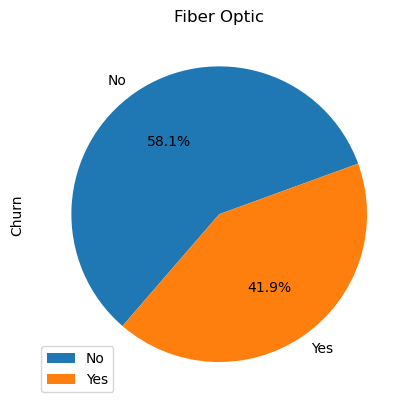

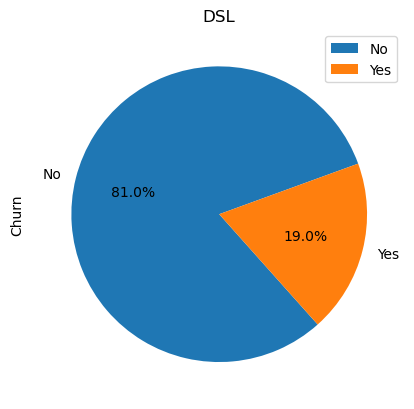

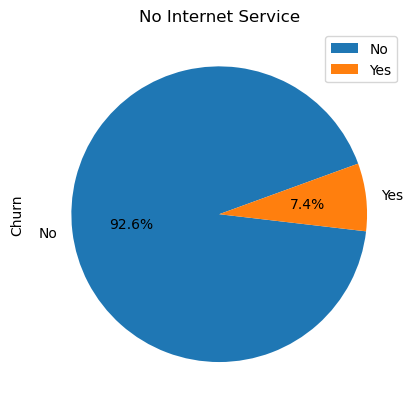

In [22]:
plt.figure(figsize = (15,5))
pie_InternetService_fo = pd.DataFrame(telecom[telecom["InternetService"] == "Fiber optic"]["Churn"].value_counts())
pie_InternetService_fo.plot.pie(subplots = True, labels = pie_InternetService_fo.index.values,autopct = "%1.1f%%",startangle = 20)
plt.title("Fiber Optic")
plt.gca().set_aspect("equal")

pie_InternetService_dsl = pd.DataFrame(telecom[telecom["InternetService"] == "DSL"]["Churn"].value_counts())
pie_InternetService_dsl.plot.pie(subplots = True, labels = pie_InternetService_dsl.index.values,autopct = "%1.1f%%",startangle = 20)
plt.title("DSL")
plt.gca().set_aspect("equal")

pie_InternetService_no = pd.DataFrame(telecom[telecom["InternetService"] == "No"]["Churn"].value_counts())
pie_InternetService_no.plot.pie(subplots = True,labels = pie_InternetService_no.index.values,autopct = "%1.1f%%",startangle = 20)
plt.title("No Internet Service")
plt.gca().set_aspect("equal")

plt.show()

In [23]:
varlist = ["PhoneService","PaperlessBilling","Churn","Partner","Dependents"]
def binary_map(x):
    return x.map({"Yes":1,"No":0})
telecom[varlist] = telecom[varlist].apply(binary_map)

In [24]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


In [25]:
telecom.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [26]:
dummy1 = pd.get_dummies(telecom[["Contract","PaymentMethod","gender","InternetService","MultipleLines","OnlineSecurity",
                               "OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]],drop_first = True)

In [27]:
telecom = pd.concat([telecom,dummy1],axis = 1)

In [28]:
telecom = telecom.drop(["Contract","PaymentMethod","gender","InternetService","MultipleLines","OnlineSecurity",
                               "OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"],axis = 1)

In [29]:
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7042 entries, 0 to 7041
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7042 non-null   object 
 1   tenure                                 7042 non-null   int64  
 2   PhoneService                           7042 non-null   int64  
 3   PaperlessBilling                       7042 non-null   int64  
 4   MonthlyCharges                         7042 non-null   float64
 5   TotalCharges                           7031 non-null   float64
 6   Churn                                  7042 non-null   int64  
 7   SeniorCitizen                          7042 non-null   int64  
 8   Partner                                7042 non-null   int64  
 9   Dependents                             7042 non-null   int64  
 10  Contract_One year                      7042 non-null   uint8  
 11  Cont

In [31]:
telecom.shape

(7042, 32)

In [32]:
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service

In [33]:
telecom = telecom[~np.isnan(telecom["TotalCharges"])]

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = telecom.drop(["customerID"],axis = 1)
Y = X.pop("Churn")

In [36]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size = 0.7,test_size=0.3,random_state = 100)

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()
X_train[["tenure","MonthlyCharges","TotalCharges"]] = scaler.fit_transform(X_train[["tenure","MonthlyCharges","TotalCharges"]])
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
879,0.032381,1,1,-0.333459,-0.269045,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5789,-0.293230,1,0,-1.491062,-0.793442,0,0,0,0,1,...,1,0,1,0,1,0,1,0,1,0
5008,-1.066555,1,0,-1.496045,-0.951355,0,0,0,0,1,...,1,0,1,0,1,0,1,0,1,0
880,-0.903749,1,1,1.508408,-0.543097,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
2784,-1.147957,1,1,1.109808,-0.828210,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0,1


In [39]:
cor = telecom.corr()
cor

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
tenure,1.000000,0.007815,0.004663,0.246663,0.825837,-0.353989,0.015771,0.382176,0.163540,0.202469,...,-0.037432,0.361341,-0.037432,0.361348,-0.037432,0.325084,-0.037432,0.280087,-0.037432,0.285228
PhoneService,0.007815,1.000000,0.016658,0.248004,0.112948,0.011720,0.008412,0.018443,-0.001047,-0.003118,...,0.171846,-0.052102,0.171846,-0.070150,0.171846,-0.095229,0.171846,-0.021444,0.171846,-0.033540
PaperlessBilling,0.004663,0.016658,1.000000,0.351834,0.157646,0.191540,0.156319,-0.013844,-0.110062,-0.052221,...,-0.320552,0.127153,-0.320552,0.103935,-0.320552,0.037360,-0.320552,0.224128,-0.320552,0.211469
MonthlyCharges,0.246663,0.248004,0.351834,1.000000,0.650949,0.193005,0.219991,0.098031,-0.112235,0.004910,...,-0.763205,0.441744,-0.763205,0.482469,-0.763205,0.338102,-0.763205,0.629578,-0.763205,0.627145
TotalCharges,0.825837,0.112948,0.157646,0.650949,1.000000,-0.199374,0.102568,0.319462,0.064861,0.170769,...,-0.374843,0.510474,-0.374843,0.522708,-0.374843,0.432621,-0.374843,0.515554,-0.374843,0.519715
Churn,-0.353989,0.011720,0.191540,0.193005,-0.199374,1.000000,0.150509,-0.150078,-0.163193,-0.178277,...,-0.227633,-0.082374,-0.227633,-0.066085,-0.227633,-0.164615,-0.227633,0.063371,-0.227633,0.060976
SeniorCitizen,0.015771,0.008412,0.156319,0.219991,0.102568,0.150509,1.000000,0.016897,-0.210600,-0.046524,...,-0.182558,0.066621,-0.182558,0.059609,-0.182558,-0.060490,-0.182558,0.105538,-0.182558,0.119936
Partner,0.382176,0.018443,-0.013844,0.098031,0.319462,-0.150078,0.016897,1.000000,0.452223,0.083003,...,-0.000358,0.141764,-0.000358,0.153777,-0.000358,0.120450,-0.000358,0.124679,-0.000358,0.118302
Dependents,0.163540,-0.001047,-0.110062,-0.112235,0.064861,-0.163193,-0.210600,0.452223,1.000000,0.069178,...,0.138341,0.023573,0.138341,0.014030,0.138341,0.063211,0.138341,-0.016384,0.138341,-0.038264
Contract_One year,0.202469,-0.003118,-0.052221,0.004910,0.170769,-0.178277,-0.046524,0.083003,0.069178,1.000000,...,0.038024,0.084065,0.038024,0.103028,0.038024,0.096391,0.038024,0.062031,0.038024,0.064880


In [40]:
correlated_features = set()
for i in range(len(cor.columns)):
    for j in range(i):
        if abs(cor.iloc[i,j]) > 0.7:
            colname1 = cor.columns[i]
            colname2 = cor.columns[j]
            print(abs(cor.iloc[i,j]),"--",i,"--",j,"--",colname1,"--",colname2)
            correlated_features.add(colname1)
            correlated_features.add(colname2)

0.8258366487064654 -- 4 -- 0 -- TotalCharges -- tenure
0.7871514742715182 -- 15 -- 3 -- InternetService_Fiber optic -- MonthlyCharges
0.7632046925843156 -- 16 -- 3 -- InternetService_No -- MonthlyCharges
1.0000000000000002 -- 17 -- 1 -- MultipleLines_No phone service -- PhoneService
0.7632046925843156 -- 19 -- 3 -- OnlineSecurity_No internet service -- MonthlyCharges
1.0 -- 19 -- 16 -- OnlineSecurity_No internet service -- InternetService_No
0.7632046925843156 -- 21 -- 3 -- OnlineBackup_No internet service -- MonthlyCharges
1.0 -- 21 -- 16 -- OnlineBackup_No internet service -- InternetService_No
1.0 -- 21 -- 19 -- OnlineBackup_No internet service -- OnlineSecurity_No internet service
0.7632046925843156 -- 23 -- 3 -- DeviceProtection_No internet service -- MonthlyCharges
1.0 -- 23 -- 16 -- DeviceProtection_No internet service -- InternetService_No
1.0 -- 23 -- 19 -- DeviceProtection_No internet service -- OnlineSecurity_No internet service
1.0 -- 23 -- 21 -- DeviceProtection_No interne

In [41]:
print(cor.columns)
print("------------")
print("correlated_features")

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'SeniorCitizen', 'Partner', 'Dependents',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes'],
      dtype='object')
------------
correlated_features


In [42]:
X_test = X_test.drop(["TotalCharges","InternetService_Fiber optic","OnlineSecurity_No internet service","OnlineBackup_No internet service",
                     "StreamingTV_No internet service","TechSupport_No internet service","StreamingMovies_No internet service",
                     "DeviceProtection_No internet service"],1)

X_train = X_train.drop(["TotalCharges","InternetService_Fiber optic","OnlineSecurity_No internet service","OnlineBackup_No internet service",
                     "StreamingTV_No internet service","TechSupport_No internet service","StreamingMovies_No internet service",
                     "DeviceProtection_No internet service"],1)

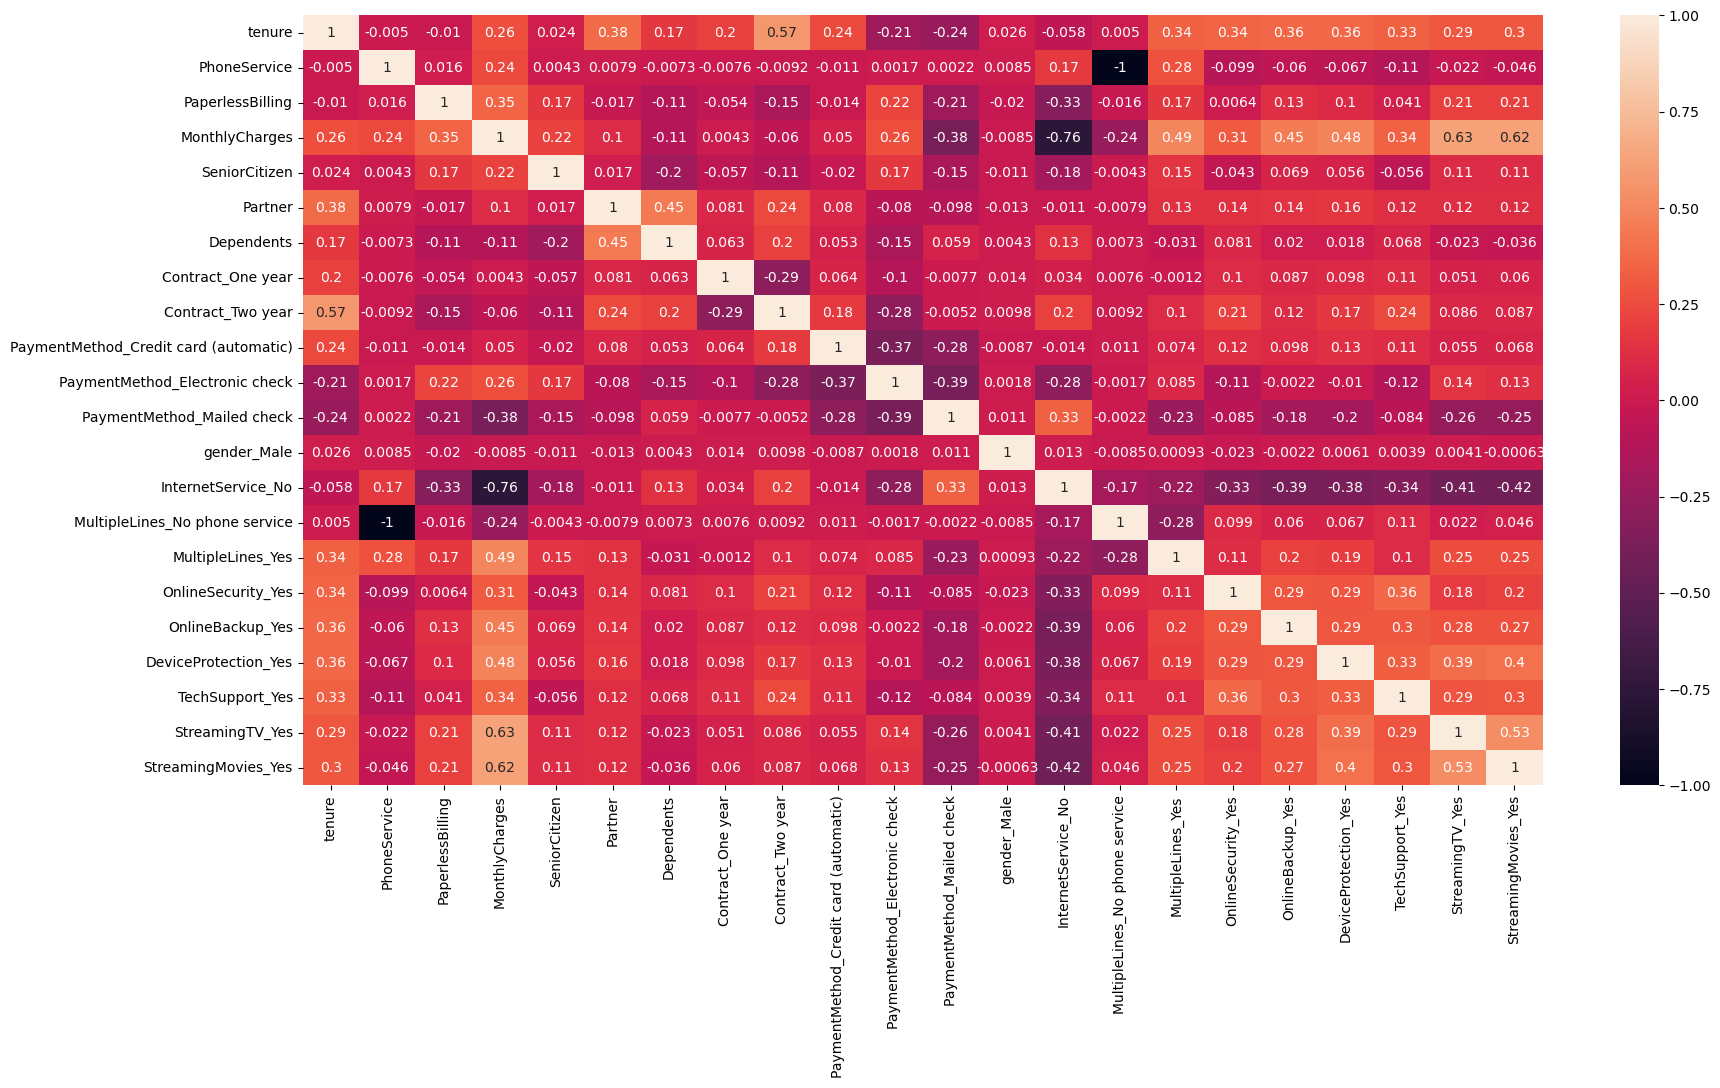

In [43]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

In [44]:
from statsmodels.tools import add_constant as add_constant

In [45]:
X_train_constant = add_constant(X_train)
X_train_constant.head()

,const,tenure,PhoneService,PaperlessBilling,MonthlyCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,gender_Male,InternetService_No,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
879,1.0,0.032381,1,1,-0.333459,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
5789,1.0,-0.293230,1,0,-1.491062,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
5008,1.0,-1.066555,1,0,-1.496045,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
880,1.0,-0.903749,1,1,1.508408,0,0,0,0,0,...,1,0,0,0,1,1,1,1,1,1
2784,1.0,-1.147957,1,1,1.109808,0,0,1,0,0,...,0,0,0,0,0,0,1,1,1,1


In [46]:
cols = X_train_constant.columns
model = smd.Logit(Y_train,X_train_constant[cols])
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.413365
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4921
Model:                          Logit   Df Residuals:                     4899
Method:                           MLE   Df Model:                           21
Date:                Tue, 18 Jul 2023   Pseudo R-squ.:                  0.2838
Time:                        18:50:04   Log-Likelihood:                -2034.2
converged:                       True   LL-Null:                       -2840.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.3525        nan        nan        nan         nan         nan
tenure                                   -0.8387      0.071    -11.893      0.000      -0.977      -0.700
PhoneService                             -0.7018        nan        nan        nan         nan         nan
PaperlessBilling                          0.3239      0.089      3.641      0.000       0.150       0.498
MonthlyCharges                            1.0003      0.130      7.697      0.000       0.746       1.255
SeniorCitizen                             0.4013      0.101      3.961      0.000       0.203       0.600
Partner                                   0.0091      0.092      0.099      0.921      -0.172       0.190
Dependents                               -0.1777      0.107     -1.657      0.098      -0.388       0.032
Contract_One year                        -0.7022      0.129     -5.431      0.000      -0.956      -0.449
Contract_Two year                        -1.3869      0.213     -6.525      0.000      -1.804      -0.970
PaymentMethod_Credit card (automatic)    -0.0834      0.136     -0.612      0.541      -0.350       0.184
PaymentMethod_Electronic check            0.2629      0.114      2.316      0.021       0.040       0.485
PaymentMethod_Mailed check               -0.0100      0.137     -0.073      0.942      -0.279       0.259
gender_Male                              -0.0519      0.078     -0.667      0.505      -0.204       0.101
InternetService_No                       -0.1385      0.224     -0.619      0.536      -0.578       0.300
MultipleLines_No phone service            0.3493        nan        nan        nan         nan         nan
MultipleLines_Yes                         0.1613      0.099      1.625      0.104      -0.033       0.356
OnlineSecurity_Yes                       -0.5175      0.101     -5.102      0.000      -0.716      -0.319
OnlineBackup_Yes                         -0.3076      0.094     -3.283      0.001      -0.491      -0.124
DeviceProtection_Yes                     -0.1030      0.097     -1.060      0.289      -0.293       0.087
TechSupport_Yes                          -0.5099      0.102     -5.014      0.000      -0.709      -0.311
StreamingTV_Yes                          -0.0992      0.108     -0.921      0.357      -0.310       0.112
StreamingMovies_Yes                      -0.0958      0.108     -0.886      0.376      -0.308       0.116
=========================================================================================================
"""

In [47]:
drop_cols = ["Partner","Dependents","PaymentMethod_Mailed check","MultipleLines_Yes","DeviceProtection_Yes","StreamingTV_Yes",
            "StreamingMovies_Yes"]
X_train_constant.drop(drop_cols,axis = 1, inplace = True)

In [48]:
model = smd.Logit(Y_train,X_train_constant)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.414389
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4921
Model:                          Logit   Df Residuals:                     4906
Method:                           MLE   Df Model:                           14
Date:                Tue, 18 Jul 2023   Pseudo R-squ.:                  0.2820
Time:                        18:50:05   Log-Likelihood:                -2039.2
converged:                       True   LL-Null:                       -2840.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.4415    8.2e+06  -5.39e-08      1.000   -1.61e+07    1.61e+07
tenure                                   -0.8295      0.066    -12.599      0.000      -0.959      -0.700
PhoneService                             -0.6604    8.2e+06  -8.06e-08      1.000   -1.61e+07    1.61e+07
PaperlessBilling                          0.3371      0.089      3.802      0.000       0.163       0.511
MonthlyCharges                            0.9232      0.086     10.689      0.000       0.754       1.092
SeniorCitizen                             0.4472      0.099      4.498      0.000       0.252       0.642
Contract_One year                        -0.7598      0.128     -5.954      0.000      -1.010      -0.510
Contract_Two year                        -1.4538      0.211     -6.881      0.000      -1.868      -1.040
PaymentMethod_Credit card (automatic)    -0.0724      0.119     -0.608      0.543      -0.306       0.161
PaymentMethod_Electronic check            0.2745      0.091      3.003      0.003       0.095       0.454
gender_Male                              -0.0527      0.078     -0.679      0.497      -0.205       0.100
InternetService_No                       -0.2253      0.202     -1.117      0.264      -0.621       0.170
MultipleLines_No phone service            0.2189    8.2e+06   2.67e-08      1.000   -1.61e+07    1.61e+07
OnlineSecurity_Yes                       -0.5135      0.100     -5.111      0.000      -0.710      -0.317
OnlineBackup_Yes                         -0.2959      0.092     -3.210      0.001      -0.477      -0.115
TechSupport_Yes                          -0.5382      0.101     -5.321      0.000      -0.736      -0.340
=========================================================================================================
"""

In [49]:
drop_cols = ["PhoneService","gender_Male","InternetService_No","MultipleLines_No phone service"]
X_train_constant.drop(drop_cols,axis = 1, inplace = True)

In [50]:
model = smd.Logit(Y_train,X_train_constant)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.418796
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4921
Model:                          Logit   Df Residuals:                     4909
Method:                           MLE   Df Model:                           11
Date:                Tue, 18 Jul 2023   Pseudo R-squ.:                  0.2744
Time:                        18:50:05   Log-Likelihood:                -2060.9
converged:                       True   LL-Null:                       -2840.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.1858      0.108    -10.943      0.000      -1.398      -0.973
tenure                                   -0.8052      0.064    -12.522      0.000      -0.931      -0.679
PaperlessBilling                          0.3817      0.088      4.345      0.000       0.209       0.554
MonthlyCharges                            0.8127      0.055     14.814      0.000       0.705       0.920
SeniorCitizen                             0.4943      0.099      4.986      0.000       0.300       0.689
Contract_One year                        -0.7976      0.126     -6.306      0.000      -1.046      -0.550
Contract_Two year                        -1.5372      0.209     -7.340      0.000      -1.948      -1.127
PaymentMethod_Credit card (automatic)    -0.0202      0.118     -0.171      0.864      -0.252       0.211
PaymentMethod_Electronic check            0.3680      0.090      4.093      0.000       0.192       0.544
OnlineSecurity_Yes                       -0.4453      0.100     -4.440      0.000      -0.642      -0.249
OnlineBackup_Yes                         -0.2207      0.092     -2.390      0.017      -0.402      -0.040
TechSupport_Yes                          -0.4539      0.101     -4.500      0.000      -0.652      -0.256
=========================================================================================================
"""

In [51]:
cols_models = ["tenure","PaperlessBilling","MonthlyCharges","SeniorCitizen","Contract_One year","Contract_Two year",
              "PaymentMethod_Credit card (automatic)","PaymentMethod_Electronic check","OnlineSecurity_Yes","OnlineBackup_Yes",
              "TechSupport_Yes"]

In [52]:
X_train1 = X_train_constant[cols_models]

In [53]:
logreg = LogisticRegression()
logreg.fit(X_train1,Y_train)

LogisticRegression()

In [54]:
Y_train_pred = logreg.predict(X_train1)

In [55]:
sklearn.metrics.accuracy_score(Y_train,Y_train_pred)

0.8000406421459053

<AxesSubplot:>

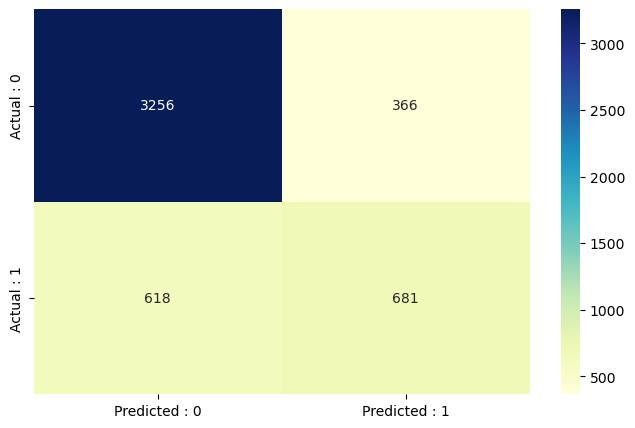

In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_train,Y_train_pred)
conf_matrix = pd.DataFrame(data = cm, columns = ["Predicted : 0","Predicted : 1"],index = ["Actual : 0","Actual : 1"])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix,annot = True,fmt = "d",cmap = "YlGnBu")

In [57]:
TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
sensitivity = TP / float(TP + FN)
specificity = TN / float(TN + FP)

[[0.79060266 0.20939734]
 [0.97505217 0.02494783]
 [0.95445743 0.04554257]
 ...
 [0.93858883 0.06141117]
 [0.88430862 0.11569138]
 [0.91868387 0.08131613]]
Logistic : ROC AUC = 0.843


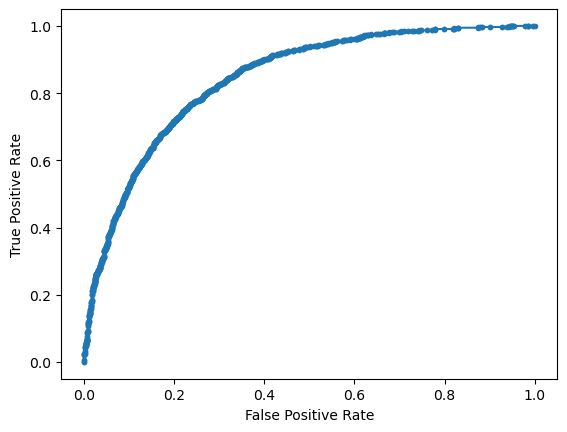

In [58]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

lr_probs = logreg.predict_proba(X_train1)
print(lr_probs)

lr_probs = lr_probs[:,1]

lr_auc = roc_auc_score(Y_train,lr_probs)

print("Logistic : ROC AUC = %.3f" % (lr_auc))

lr_fpr, lr_tpr,_ = roc_curve(Y_train, lr_probs)

plt.plot(lr_fpr, lr_tpr, marker = ".")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [59]:
pd.DataFrame(zip(lr_fpr, lr_tpr), columns = ("FPR","TPR"))

,FPR,TPR
0,0.000000,0.000000
1,0.000000,0.000770
2,0.000000,0.004619
3,0.000276,0.004619
4,0.000276,0.021555
...,...,...
1439,0.984539,1.000000
1440,0.985091,1.000000
1441,0.995306,1.000000
1442,0.995859,1.000000


In [60]:
Y_train_pred_final = pd.DataFrame({"Churn":Y_train.values, "Churn_prob": lr_probs})
Y_train_pred_final["CustID"] = Y_train.index
Y_train_pred_final.head(20)

,Churn,Churn_prob,CustID
0,0,0.209397,879
1,0,0.024948,5789
2,0,0.045543,5008
3,1,0.598008,880
4,1,0.637618,2784
5,0,0.006610,3873
6,0,0.351862,5386
7,1,0.433319,6622
8,1,0.374612,4464
9,0,0.216614,5278


In [61]:
Y_train_pred_final["Predicted"] = Y_train_pred_final.Churn_prob.map(lambda x:1 if x > 0.5 else 0)
Y_train_pred_final.head()

,Churn,Churn_prob,CustID,Predicted
0,0,0.209397,879,0
1,0,0.024948,5789,0
2,0,0.045543,5008,0
3,1,0.598008,880,1
4,1,0.637618,2784,1


In [62]:
from sklearn import metrics
confusion = metrics.confusion_matrix(Y_train_pred_final.Churn, Y_train_pred_final.Predicted)
print(confusion)

[[3256  366]
 [ 618  681]]


In [63]:
print(metrics.accuracy_score(Y_train_pred_final.Churn, Y_train_pred_final.Predicted))

0.8000406421459053


In [64]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    Y_train_pred_final[i] = Y_train_pred_final.Churn_prob.map(lambda x:1 if x > i else 0)
Y_train_pred_final.head()

,Churn,Churn_prob,CustID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.209397,879,0,1,1,1,0,0,0,0,0,0,0
1,0,0.024948,5789,0,1,0,0,0,0,0,0,0,0,0
2,0,0.045543,5008,0,1,0,0,0,0,0,0,0,0,0
3,1,0.598008,880,1,1,1,1,1,1,1,0,0,0,0
4,1,0.637618,2784,1,1,1,1,1,1,1,1,0,0,0


In [65]:
numbers 

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [66]:
cutoff_df = pd.DataFrame(columns = ["prob","accuracy","sensi","speci"])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(Y_train_pred_final.Churn, Y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0] + cm1[1,1])/total1
    speci    = cm1[0,0] / (cm1[0,0] + cm1[0,1])
    sensi    = cm1[1,1] / (cm1[1,0] + cm1[1,1])
    
    cutoff_df.loc[i] = [i, accuracy, sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.263971  1.000000  0.000000
0.1   0.1  0.603536  0.941493  0.482330
0.2   0.2  0.706767  0.874519  0.646604
0.3   0.3  0.766104  0.758276  0.768912
0.4   0.4  0.792725  0.652810  0.842904
0.5   0.5  0.800041  0.524249  0.898951
0.6   0.6  0.790896  0.356428  0.946715
0.7   0.7  0.771794  0.183988  0.982606
0.8   0.8  0.743345  0.035412  0.997239
0.9   0.9  0.736029  0.000000  1.000000


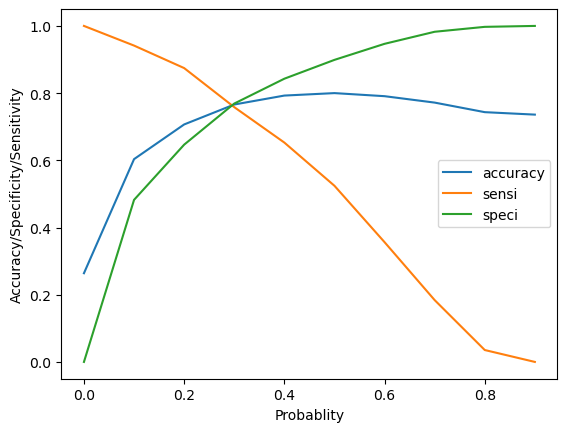

In [67]:
cutoff_df.plot.line(x = "prob", y = ["accuracy","sensi","speci"])
plt.xlabel("Probablity")
plt.ylabel("Accuracy/Specificity/Sensitivity")
plt.show()

In [68]:
Y_train_pred_final["Final_Predicted"] = Y_train_pred_final.Churn_prob.map(lambda x:1 if x > 0.3 else 0)
Y_train_pred_final.head(10)

,Churn,Churn_prob,CustID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.209397,879,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.024948,5789,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.045543,5008,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.598008,880,1,1,1,1,1,1,1,0,0,0,0,1
4,1,0.637618,2784,1,1,1,1,1,1,1,1,0,0,0,1
5,0,0.006610,3873,0,1,0,0,0,0,0,0,0,0,0,0
6,0,0.351862,5386,0,1,1,1,1,0,0,0,0,0,0,1
7,1,0.433319,6622,0,1,1,1,1,1,0,0,0,0,0,1
8,1,0.374612,4464,0,1,1,1,1,0,0,0,0,0,0,1
9,0,0.216614,5278,0,1,1,1,0,0,0,0,0,0,0,0


In [69]:
metrics.accuracy_score(Y_train_pred_final.Churn,Y_train_pred_final.Final_Predicted)

0.7661044503149766

In [70]:
confusion2 = metrics.confusion_matrix(Y_train_pred_final.Churn,Y_train_pred_final.Final_Predicted)
confusion2

array([[2785,  837],
       [ 314,  985]], dtype=int64)

In [71]:
print("Precision")
confusion[1,1] / (confusion[0,1] + confusion[1,1])

Precision


0.6504297994269341

In [72]:
print("Recall")
confusion[1,1] / (confusion[1,0] + confusion[1,1])

Recall


0.5242494226327945

In [73]:
from sklearn.metrics import precision_score,recall_score
precision_score(Y_train_pred_final.Churn,Y_train_pred_final.Predicted)

0.6504297994269341

In [74]:
recall_score(Y_train_pred_final.Churn,Y_train_pred_final.Predicted)

0.5242494226327945

In [75]:
from sklearn.metrics import precision_recall_curve

In [76]:
pd.DataFrame(zip(Y_train_pred_final.Churn, Y_train_pred_final.Predicted))

,0,1
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
4916,0,0
4917,0,0
4918,0,0
4919,0,0


In [77]:
p,r,thresholds = precision_recall_curve(Y_train_pred_final.Churn, Y_train_pred_final.Churn_prob)

In [78]:
pd.DataFrame(zip(p,r,thresholds), columns = ("Precision","Recall","Thresholds")).head(10)

,Precision,Recall,Thresholds
0,0.273820,1.00000,0.008339
1,0.273666,0.99923,0.008341
2,0.273724,0.99923,0.008345
3,0.273782,0.99923,0.008357
4,0.273840,0.99923,0.008372
5,0.273897,0.99923,0.008451
6,0.273955,0.99923,0.008460
7,0.274013,0.99923,0.008477
8,0.274071,0.99923,0.008480
9,0.274129,0.99923,0.008544


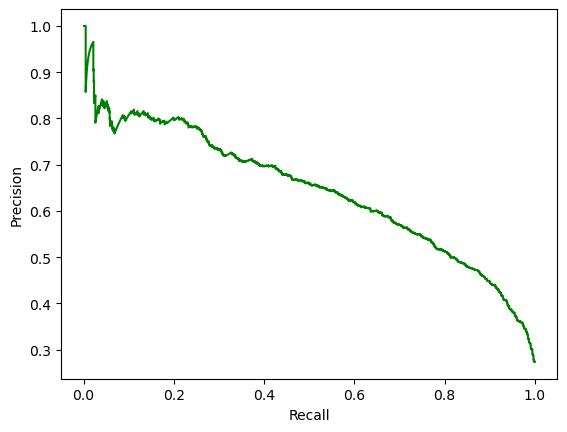

In [79]:
plt.plot(r[:-1],p[:-1], "g-")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

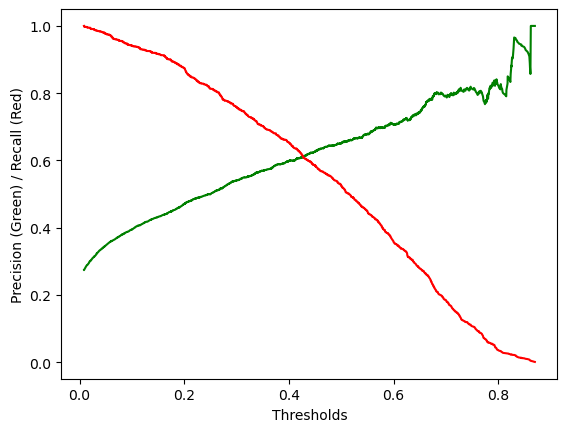

In [80]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds,r[:-1], "r-")
plt.xlabel("Thresholds")
plt.ylabel("Precision (Green) / Recall (Red)")
plt.show()

In [81]:
X_test = X_test[cols_models]
X_test

,tenure,PaperlessBilling,MonthlyCharges,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,OnlineSecurity_Yes,OnlineBackup_Yes,TechSupport_Yes
942,24,1,79.85,0,0,0,1,0,0,0,0
3729,62,1,20.05,0,0,1,1,0,0,0,0
1761,58,1,24.45,0,0,1,1,0,0,0,0
2283,1,1,71.55,0,0,0,0,0,0,0,0
1872,41,0,19.70,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1289,63,0,68.80,0,1,0,0,0,1,1,1
6347,15,1,68.60,0,0,0,0,0,0,0,0
6403,72,1,116.60,0,0,1,0,0,1,1,1
3597,25,1,95.70,0,0,0,1,0,0,0,1


In [82]:
Scaler = StandardScaler()
X_test[["tenure","MonthlyCharges"]] = Scaler.fit_transform(X_test[["tenure","MonthlyCharges"]])
X_test

,tenure,PaperlessBilling,MonthlyCharges,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,OnlineSecurity_Yes,OnlineBackup_Yes,TechSupport_Yes
942,-0.364216,1,0.493442,0,0,0,1,0,0,0,0
3729,1.188632,1,-1.498148,0,0,1,1,0,0,0,0
1761,1.025174,1,-1.351610,0,0,1,1,0,0,0,0
2283,-1.304098,1,0.217017,0,0,0,0,0,0,0,0
1872,0.330479,0,-1.509805,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1289,1.229496,0,0.125430,0,1,0,0,0,1,1,1
6347,-0.731996,1,0.118770,0,0,0,0,0,0,0,0
6403,1.597276,1,1.717370,0,0,1,0,0,1,1,1
3597,-0.323352,1,1.021313,0,0,0,1,0,0,0,1


In [83]:
list(zip(X_train1.columns, X_test.columns))

[('tenure', 'tenure'),
 ('PaperlessBilling', 'PaperlessBilling'),
 ('MonthlyCharges', 'MonthlyCharges'),
 ('SeniorCitizen', 'SeniorCitizen'),
 ('Contract_One year', 'Contract_One year'),
 ('Contract_Two year', 'Contract_Two year'),
 ('PaymentMethod_Credit card (automatic)',
  'PaymentMethod_Credit card (automatic)'),
 ('PaymentMethod_Electronic check', 'PaymentMethod_Electronic check'),
 ('OnlineSecurity_Yes', 'OnlineSecurity_Yes'),
 ('OnlineBackup_Yes', 'OnlineBackup_Yes'),
 ('TechSupport_Yes', 'TechSupport_Yes')]

In [84]:
Y_test_pred = logreg.predict(X_test)

In [85]:
list(zip(Y_test_pred[:10] , Y_test[:10]))

[(0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0)]

In [86]:
Y_pred_1 = pd.DataFrame(Y_test_pred)

In [87]:
Y_pred_1.head()

,0
0,0
1,0
2,0
3,1
4,0


In [88]:
Y_test_df = pd.DataFrame(Y_test)

In [89]:
Y_test_df["CustID"] = Y_test_df.index

In [90]:
Y_pred_1.reset_index(drop = True, inplace = True)
Y_test_df.reset_index(drop = True, inplace = True)

In [91]:
Y_pred_final = pd.concat([Y_test_df , Y_pred_1], axis = 1)

In [93]:
lr_probs_test = logreg.predict_proba(X_test)
lr_probs_test = lr_probs_test[:,1]
Y_pred_final["Churn_prob"] = lr_probs_test
Y_pred_final["Churn_prob"] = lr_probs_test

In [94]:
lr_probs_test

array([0.46547728, 0.01107749, 0.01420121, ..., 0.03530077, 0.45078216,
       0.00561247])

In [95]:
Y_pred_final

,Churn,CustID,0,Churn_prob
0,0,942,0,0.465477
1,0,3729,0,0.011077
2,0,1761,0,0.014201
3,1,2283,1,0.603823
4,0,1872,0,0.015293
...,...,...,...,...
2105,0,1289,0,0.018218
2106,0,6347,0,0.469438
2107,0,6403,0,0.035301
2108,0,3597,0,0.450782


In [96]:
Y_pred_final["Final_Predicted"] = Y_pred_final.Churn_prob.map(lambda x:1 if x > 0.42 else 0)

In [97]:
Y_pred_final.head()

,Churn,CustID,0,Churn_prob,Final_Predicted
0,0,942,0,0.465477,1
1,0,3729,0,0.011077,0
2,0,1761,0,0.014201,0
3,1,2283,1,0.603823,1
4,0,1872,0,0.015293,0


In [100]:
metrics.accuracy_score(Y_pred_final.Churn,Y_pred_final.Final_Predicted)

0.7848341232227488

In [101]:
confusion2 = metrics.confusion_matrix(Y_pred_final.Churn, Y_pred_final.Final_Predicted)
confusion2

array([[1307,  233],
       [ 221,  349]], dtype=int64)